/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_4062107/2820668644.py:62: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from curren

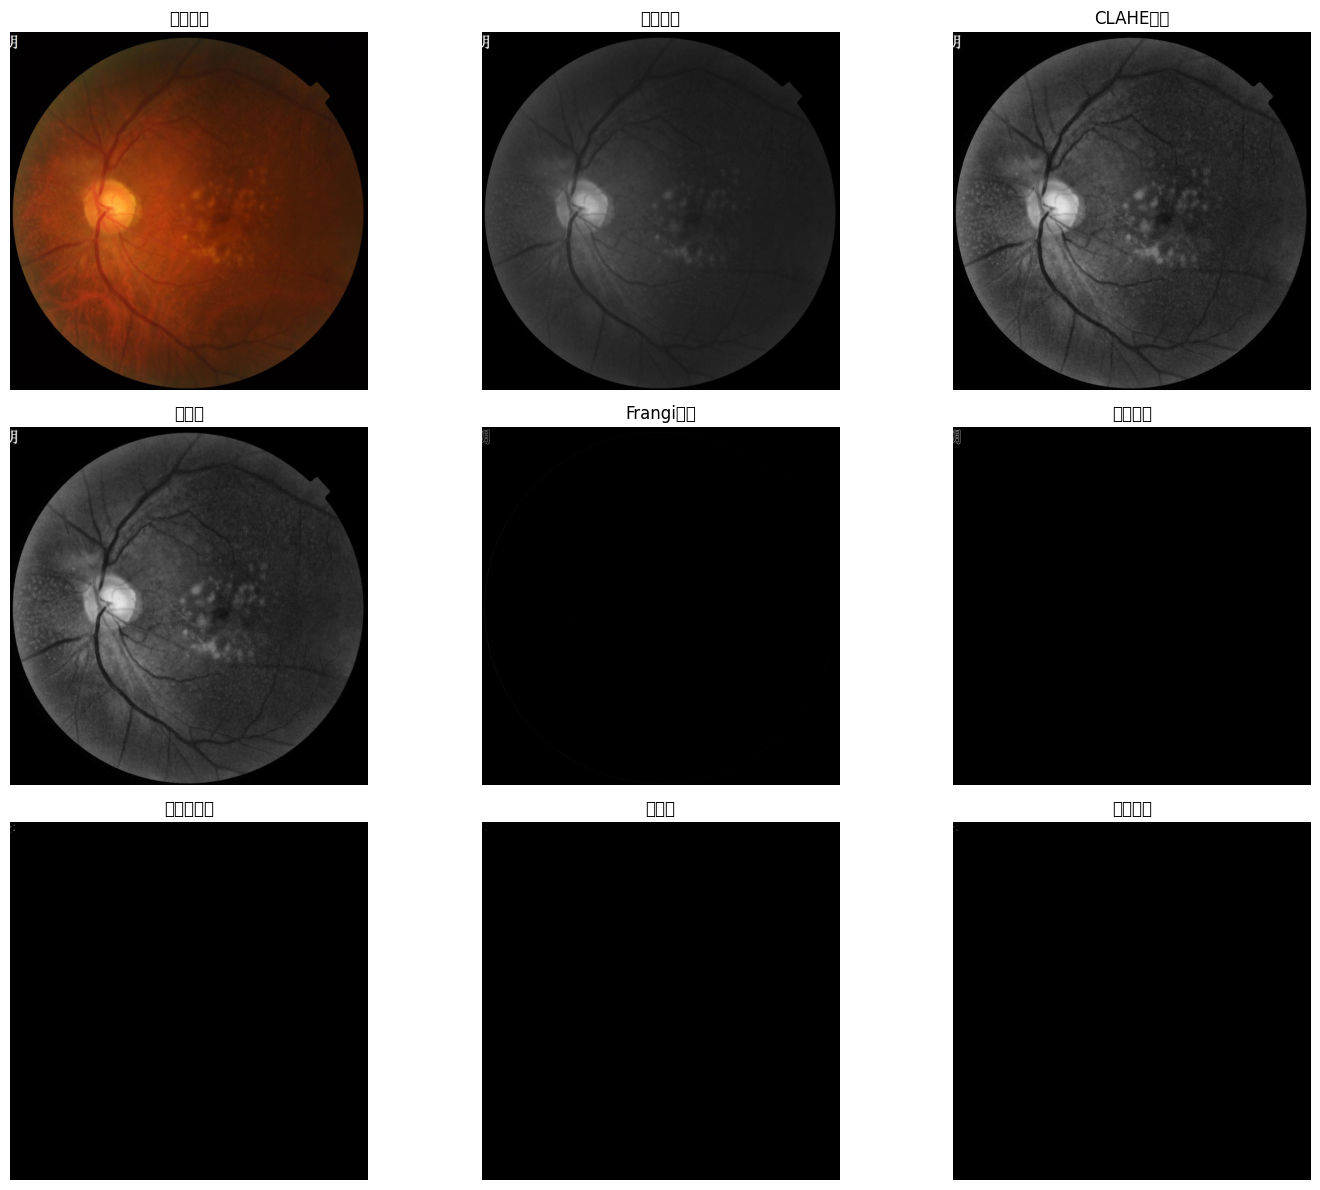

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi
from skimage import img_as_float
from skimage.morphology import skeletonize

# 读取图像
image_path = '/home/pxl/myProject/血管分割/RawData/FIVES-rawData/train/Original/51_A.png'  # 确保路径正确
image = cv.imread(image_path)

if image is None:
    raise ValueError(f"图像未能加载成功，请检查路径是否正确: {image_path}")

# 提取绿色通道
green_channel = image[:,:,1]

# 对比度增强（CLAHE）
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(green_channel)

# 降噪（高斯滤波）
denoised_image = cv.GaussianBlur(enhanced_image, (5, 5), 0)

# Frangi血管增强滤波器
float_image = img_as_float(denoised_image)
vessel_enhanced = frangi(float_image)

# 归一化到0-255
vessel_enhanced = (vessel_enhanced - vessel_enhanced.min()) / (vessel_enhanced.max() - vessel_enhanced.min())
vessel_enhanced = (vessel_enhanced * 255).astype('uint8')

# 阈值分割（Otsu阈值）
_, binary_image = cv.threshold(vessel_enhanced, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 形态学处理
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
opened_image = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel, iterations=1)
closed_image = cv.morphologyEx(opened_image, cv.MORPH_CLOSE, kernel, iterations=1)

# 骨架化
bool_image = closed_image.astype(bool)
skeleton = skeletonize(bool_image)
skeleton_image = (skeleton * 255).astype('uint8')

# 后处理（平滑边缘）
smoothed_image = cv.GaussianBlur(skeleton_image, (3, 3), 0)

# 显示结果
titles = ['原始图像', '绿色通道', 'CLAHE增强', '降噪后', 'Frangi增强', '阈值分割', '形态学处理', '骨架化', '最终结果']
images = [image, green_channel, enhanced_image, denoised_image, vessel_enhanced, binary_image, closed_image, skeleton_image, smoothed_image]

plt.figure(figsize=(15, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    if i == 0:
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()